In [1]:
#importing the packages
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import collections
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#Print multiple statements in same line
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
automobile=pd.read_csv('Automobile_data.csv')

In [4]:
automobile.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.4,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.4,7.0,160,5500,16,22,?


In [5]:
automobile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression-ratio    205 non-null float64
horsepower           205 non-nul

In [6]:
automobile.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


Data Cleaning

In [7]:
#Dropping the rows with NaN values
automobile_na = automobile.dropna(how='any')

In [8]:
#To find out if there are any NULL Fields
(automobile.isnull().sum()/len(automobile))*100

symboling            0.0
normalized-losses    0.0
make                 0.0
fuel-type            0.0
aspiration           0.0
num-of-doors         0.0
body-style           0.0
drive-wheels         0.0
engine-location      0.0
wheel-base           0.0
length               0.0
width                0.0
height               0.0
curb-weight          0.0
engine-type          0.0
num-of-cylinders     0.0
engine-size          0.0
fuel-system          0.0
bore                 0.0
stroke               0.0
compression-ratio    0.0
horsepower           0.0
peak-rpm             0.0
city-mpg             0.0
highway-mpg          0.0
price                0.0
dtype: float64

Cleaning the normalized losses field

In [9]:
# Finding out no. of records having '?' value for normalized losses
automobile['normalized-losses'].loc[automobile['normalized-losses'] == '?'].count()

# Setting the missing value to mean of normalized losses and convert the datatype to integer
nl = automobile['normalized-losses'].loc[automobile['normalized-losses'] != '?']
nlmean = nl.astype(str).astype(int).mean()
automobile['normalized-losses'] = automobile['normalized-losses'].replace('?',nlmean).astype(int)
automobile['normalized-losses'].head()

41

0    122
1    122
2    122
3    164
4    164
Name: normalized-losses, dtype: int32

Cleaning the price data

In [10]:
# Finding out the non numeric value
automobile['price'].str.isnumeric().value_counts()

# List out the values which are not numeric
automobile['price'].loc[automobile['price'].str.isnumeric() == False]

True     201
False      4
Name: price, dtype: int64

9      ?
44     ?
45     ?
129    ?
Name: price, dtype: object

In [11]:
#Setting the missing value to mean of price and converting the datatype to integer
price = automobile['price'].loc[automobile['price'] != '?']
pmean = price.astype(str).astype(int).mean()
automobile['price'] = automobile['price'].replace('?',pmean).astype(int)
automobile['price'].head()

0    13495
1    16500
2    16500
3    13950
4    17450
Name: price, dtype: int32

Cleaning the horsepower

In [12]:
# Checking the numeric and replacing with mean value and converting the datatype to integer
automobile['horsepower'].str.isnumeric().value_counts()
horsepower = automobile['horsepower'].loc[automobile['horsepower'] != '?']
hpmean = horsepower.astype(str).astype(int).mean()
automobile['horsepower'] = automobile['horsepower'].replace('?',pmean).astype(int)

True     203
False      2
Name: horsepower, dtype: int64

In [13]:
#Checking the outlier of horsepower
automobile.loc[automobile['horsepower'] > 10000]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
130,0,122,renault,gas,std,four,wagon,fwd,front,96.1,...,132,mpfi,3.46,3.9,8.7,13207,?,23,31,9295
131,2,122,renault,gas,std,two,hatchback,fwd,front,96.1,...,132,mpfi,3.46,3.9,8.7,13207,?,23,31,9895


In [14]:
#Excluding the outlier data for horsepower
automobile[np.abs(automobile.horsepower-automobile.horsepower.mean())<=(3*automobile.horsepower.std())]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.00,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.00,115,5500,18,22,17450
5,2,122,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.4,8.50,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.50,110,5500,19,25,17710
7,1,122,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.50,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.4,8.30,140,5500,17,20,23875
9,0,122,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.4,7.00,160,5500,16,22,13207


In [15]:
# Find out the number of invalid value for bore
automobile['bore'].loc[automobile['bore'] == '?']

55    ?
56    ?
57    ?
58    ?
Name: bore, dtype: object

In [16]:
# Replacing the non-numeric value to null and converting the datatype
automobile['bore'] = pd.to_numeric(automobile['bore'],errors='coerce')
automobile.dtypes

symboling              int64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke                object
compression-ratio    float64
horsepower             int32
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                  int32
dtype: object

Cleaning the stroke

In [17]:
# Replacing the non-numeric value to null and converting the datatype
automobile['stroke'] = pd.to_numeric(automobile['stroke'],errors='coerce')
automobile.dtypes

symboling              int64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int32
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                  int32
dtype: object

Cleaning peak rpm data

In [18]:
# Converting the non-numeric data to null and converting the datatype
automobile['peak-rpm'] = pd.to_numeric(automobile['peak-rpm'],errors='coerce')
automobile.dtypes

symboling              int64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int32
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                  int32
dtype: object

Cleaning the num-of-doors data

In [19]:
# Removing the records with '?' value
automobile['num-of-doors'].loc[automobile['num-of-doors'] == '?']
automobile = automobile[automobile['num-of-doors'] != '?']
automobile['num-of-doors'].loc[automobile['num-of-doors'] == '?']

27    ?
63    ?
Name: num-of-doors, dtype: object

Series([], Name: num-of-doors, dtype: object)

In [20]:
#Separating Car model from company name
companies= automobile['make'].str.split(expand =True)
automobile['car_company'] = companies.loc[:,0]
automobile['car_company'] 
automobile.head()

0      alfa-romero
1      alfa-romero
2      alfa-romero
3             audi
4             audi
5             audi
6             audi
7             audi
8             audi
9             audi
10             bmw
11             bmw
12             bmw
13             bmw
14             bmw
15             bmw
16             bmw
17             bmw
18       chevrolet
19       chevrolet
20       chevrolet
21           dodge
22           dodge
23           dodge
24           dodge
25           dodge
26           dodge
28           dodge
29           dodge
30           honda
          ...     
175         toyota
176         toyota
177         toyota
178         toyota
179         toyota
180         toyota
181         toyota
182     volkswagen
183     volkswagen
184     volkswagen
185     volkswagen
186     volkswagen
187     volkswagen
188     volkswagen
189     volkswagen
190     volkswagen
191     volkswagen
192     volkswagen
193     volkswagen
194          volvo
195          volvo
196         

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,car_company
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495,alfa-romero
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500,alfa-romero
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500,alfa-romero
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950,audi
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450,audi


In [21]:
#Checking for unique values for each column
automobile.nunique()

symboling              6
normalized-losses     51
make                  22
fuel-type              2
aspiration             2
num-of-doors           2
body-style             5
drive-wheels           3
engine-location        2
wheel-base            53
length                75
width                 44
height                49
curb-weight          170
engine-type            7
num-of-cylinders       7
engine-size           44
fuel-system            8
bore                  38
stroke                36
compression-ratio     31
horsepower            59
peak-rpm              22
city-mpg              28
highway-mpg           30
price                185
car_company           22
dtype: int64

In [22]:
#Analysing each column further
automobile.groupby('car_company').count()['price'].sort_values(ascending=False)

car_company
toyota           32
nissan           18
mazda            16
honda            13
mitsubishi       13
subaru           12
volkswagen       12
peugot           11
volvo            11
mercedes-benz     8
bmw               8
dodge             8
plymouth          7
audi              7
saab              6
porsche           5
isuzu             4
chevrolet         3
alfa-romero       3
jaguar            3
renault           2
mercury           1
Name: price, dtype: int64

In [23]:
#Car price company wise
automobile.groupby('car_company').mean()['price'].sort_values(ascending =False)

car_company
jaguar           34600.000000
mercedes-benz    33647.000000
porsche          27761.800000
bmw              26118.750000
volvo            18063.181818
audi             17194.571429
mercury          16503.000000
alfa-romero      15498.333333
peugot           15489.090909
saab             15223.333333
isuzu            11061.750000
mazda            10644.000000
nissan           10415.666667
volkswagen       10077.500000
toyota            9885.812500
renault           9595.000000
mitsubishi        9239.769231
subaru            8541.250000
honda             8184.692308
plymouth          7963.428571
dodge             7790.125000
chevrolet         6007.000000
Name: price, dtype: float64

We can see that car-company may have affect on price as the price varies with company

In [24]:
automobile.groupby('fuel-type').sum()['price'].sort_values(ascending =False)

fuel-type
gas       2382140
diesel     305968
Name: price, dtype: int32

In [25]:
automobile.groupby('engine-size').sum()['price'].sort_values(ascending =False)

engine-size
122    132026
108    130732
141    117370
110    114321
183    113576
97     109419
209    108955
98     105834
194    103584
92     101597
181     96694
152     95485
120     91743
121     91340
90      90256
136     82625
109     82475
234     69240
146     68494
258     67800
156     67715
130     67365
164     66640
171     48246
304     45400
308     40960
131     37082
134     36494
70      36435
326     36000
140     34783
91      32175
145     22470
151     22018
173     21485
132     19190
161     15750
80      15645
203     13207
119     11048
103      7099
111      6785
79       5399
61       5151
Name: price, dtype: int32

In [26]:
automobile.groupby('curb-weight').sum()['price'].sort_values(ascending =False)

curb-weight
4066    67800
2756    66556
3715    45400
3230    43200
2385    42318
3380    41315
3900    40960
3139    38098
2800    37028
3505    36880
3950    36000
3685    35056
3252    34850
3740    34184
2395    33355
3075    32210
3770    31600
2548    29995
3750    28248
3495    28176
3515    25552
3055    24565
2275    24181
3086    23875
2579    23140
2380    22790
3062    22625
3217    22470
2778    22018
3012    21485
        ...  
2191     7609
2240     7603
1971     7499
1950     7395
1951     7299
2010     7295
2109     7198
1956     7129
2017     7099
2120     7053
2365     6989
2081     6938
2280     6918
1819     6855
1938     6849
1905     6795
1945     6695
2004     6669
1940     6529
2015     6488
1713     6479
2040     6338
1944     6189
1900     6095
1889     5499
1837     5399
1985     5348
1890     5195
1488     5151
2050     5118
Name: price, Length: 170, dtype: int32

In [27]:
automobile.groupby('wheel-base').mean()['price'].sort_values(ascending =False)

wheel-base
112.0    45400.000000
120.9    40960.000000
102.0    36000.000000
96.6     35056.000000
89.5     34528.000000
113.0    33900.000000
115.6    32892.000000
103.5    32213.333333
110.0    30226.666667
106.7    28176.000000
109.1    20494.000000
105.8    20168.333333
101.2    18857.500000
91.3     18449.000000
99.2     18399.000000
104.9    18312.000000
108.0    18150.000000
99.4     17450.000000
102.7    16503.000000
102.9    16278.000000
104.3    16037.500000
104.5    15720.000000
107.9    15360.000000
99.1     15223.333333
114.2    15017.500000
88.6     14997.500000
99.8     14600.000000
95.9     13543.000000
100.4    13471.166667
99.5     13207.000000
95.3     13020.000000
98.4     11671.571429
96.0     11048.000000
102.4    10356.000000
98.8      9885.000000
96.9      9853.500000
96.1      9595.000000
97.0      9538.250000
94.5      9454.761905
96.5      9251.250000
103.3     8921.000000
96.3      8699.000000
97.2      8671.800000
97.3      8560.714286
95.1      8249.000000

Data Visualization

In [28]:
#Creating correlation matrix to see if there is a correlation
x = automobile.corr()
x

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,1.000000,0.465972,-0.532929,-0.357856,-0.232241,-0.541323,-0.228520,-0.105985,-0.133130,-0.007956,-0.172343,0.015084,0.272162,-0.030513,0.040374,-0.083020
normalized-losses,0.465972,1.000000,-0.053305,0.024851,0.088535,-0.368117,0.100921,0.114135,-0.025036,0.053674,-0.115170,0.006646,0.235915,-0.219883,-0.179295,0.136770
wheel-base,-0.532929,-0.053305,1.000000,0.874651,0.794488,0.588281,0.775870,0.568141,0.488138,0.163744,0.254105,-0.033582,-0.359843,-0.475257,-0.549141,0.582379
length,-0.357856,0.024851,0.874651,1.000000,0.840300,0.486316,0.878719,0.682984,0.604518,0.132778,0.154219,0.057880,-0.283068,-0.682433,-0.715913,0.683494
width,-0.232241,0.088535,0.794488,0.840300,1.000000,0.274216,0.867307,0.735016,0.556721,0.185110,0.178893,0.049239,-0.216229,-0.651892,-0.686216,0.728917
height,-0.541323,-0.368117,0.588281,0.486316,0.274216,1.000000,0.293892,0.063622,0.169575,-0.056016,0.253871,-0.039362,-0.316713,-0.056337,-0.115209,0.132614
curb-weight,-0.228520,0.100921,0.775870,0.878719,0.867307,0.293892,1.000000,0.850236,0.648345,0.171289,0.156838,0.015621,-0.266077,-0.762457,-0.802444,0.820439
engine-size,-0.105985,0.114135,0.568141,0.682984,0.735016,0.063622,0.850236,1.000000,0.592931,0.209022,0.029468,0.036593,-0.243784,-0.658584,-0.682212,0.861545
bore,-0.133130,-0.025036,0.488138,0.604518,0.556721,0.169575,0.648345,0.592931,1.000000,-0.054250,-0.001731,0.065241,-0.260465,-0.603529,-0.602912,0.531935
stroke,-0.007956,0.053674,0.163744,0.132778,0.185110,-0.056016,0.171289,0.209022,-0.054250,1.000000,0.185802,0.207844,-0.071544,-0.046312,-0.048075,0.084217


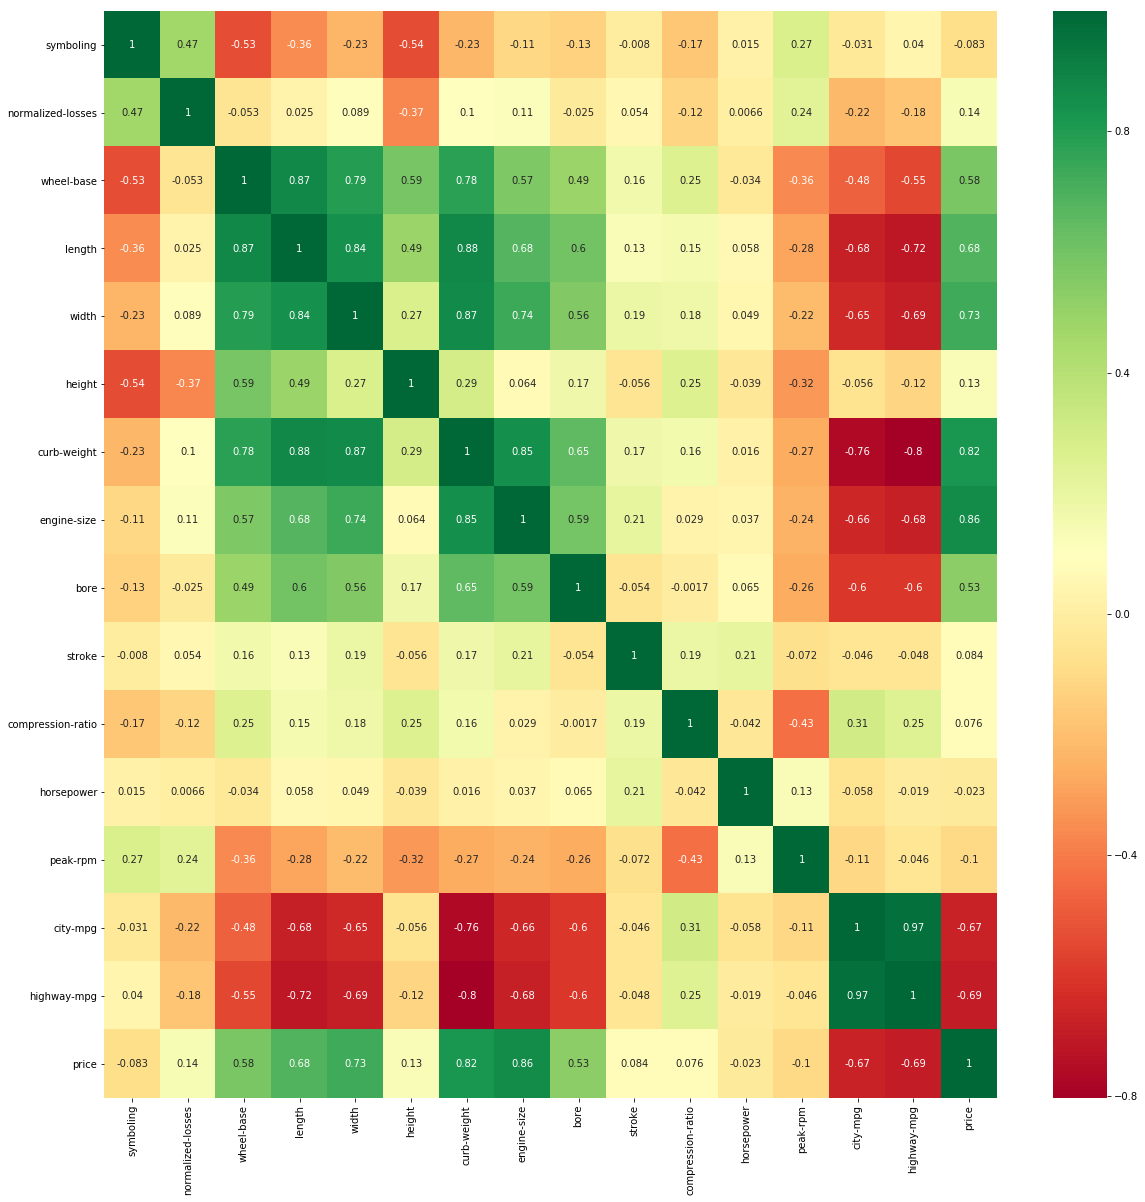

In [29]:
#Creating heatmap to visualize correlations
plt.subplots(figsize =(20,20))
sns.heatmap(x,cmap='RdYlGn',annot =True)
plt.show();

We can see a strong correlation with variables horsepower, curb-weight, engine-size, car width, car length and wheel-base. Also there is a strong correlation between city-mpg and highway-mpg.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203 entries, 0 to 204
Data columns (total 27 columns):
symboling            203 non-null int64
normalized-losses    203 non-null int32
make                 203 non-null object
fuel-type            203 non-null object
aspiration           203 non-null object
num-of-doors         203 non-null object
body-style           203 non-null object
drive-wheels         203 non-null object
engine-location      203 non-null object
wheel-base           203 non-null float64
length               203 non-null float64
width                203 non-null float64
height               203 non-null float64
curb-weight          203 non-null int64
engine-type          203 non-null object
num-of-cylinders     203 non-null object
engine-size          203 non-null int64
fuel-system          203 non-null object
bore                 199 non-null float64
stroke               199 non-null float64
compression-ratio    203 non-null float64
horsepower           203 non-nu

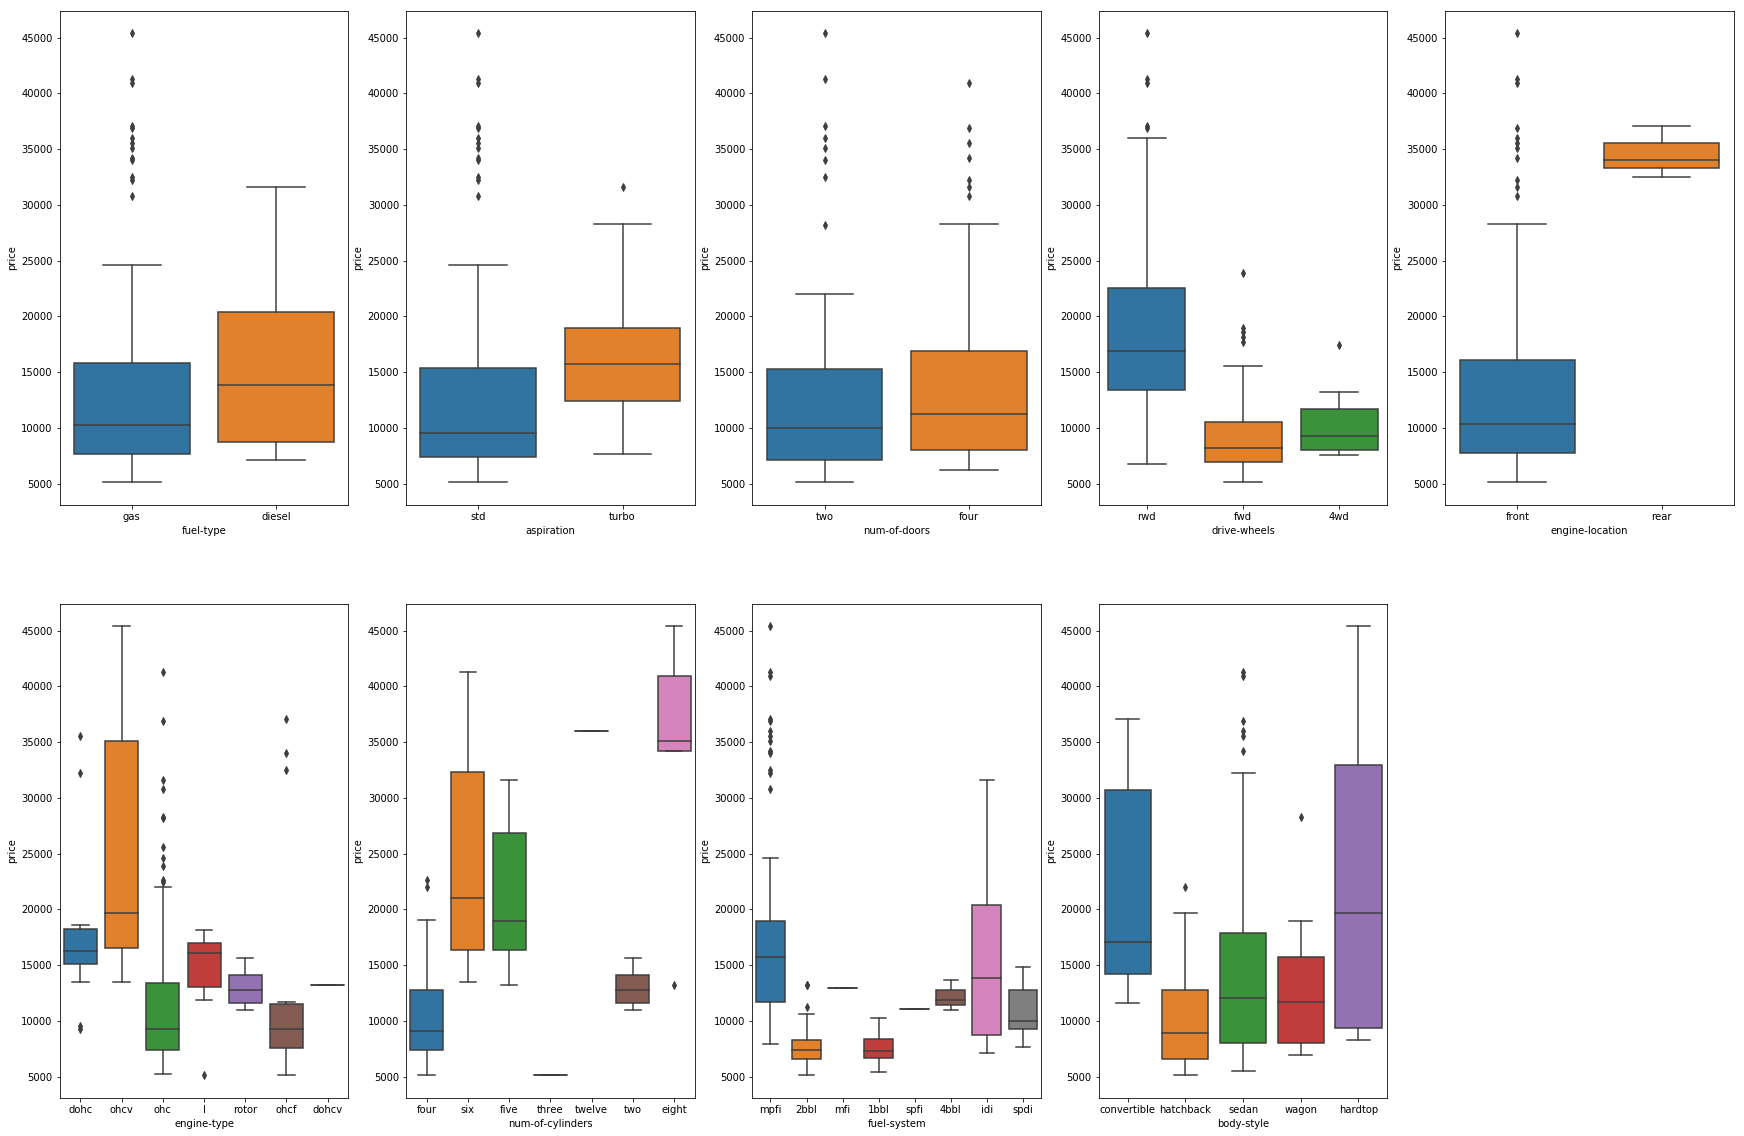

In [30]:
#Analysing the categorical variables
plt.figure(figsize=(30,20))
plt.subplot(2,5,1)
sns.boxplot(x = 'fuel-type',y ='price',data = automobile )
plt.subplot(2,5,2)
sns.boxplot(x = 'aspiration',y ='price',data = automobile )
plt.subplot(2,5,3)
sns.boxplot(x = 'num-of-doors',y ='price',data = automobile )
plt.subplot(2,5,4)
sns.boxplot(x = 'drive-wheels',y ='price',data = automobile )
plt.subplot(2,5,5)
sns.boxplot(x = 'engine-location',y ='price',data = automobile )
plt.subplot(2,5,6)
sns.boxplot(x = 'engine-type',y ='price',data = automobile )
plt.subplot(2,5,7)
sns.boxplot(x = 'num-of-cylinders',y ='price',data = automobile )
plt.subplot(2,5,8)
sns.boxplot(x = 'fuel-system',y ='price',data = automobile )
plt.subplot(2,5,9)
sns.boxplot(x = 'body-style',y ='price',data = automobile )
automobile.info()
plt.show();

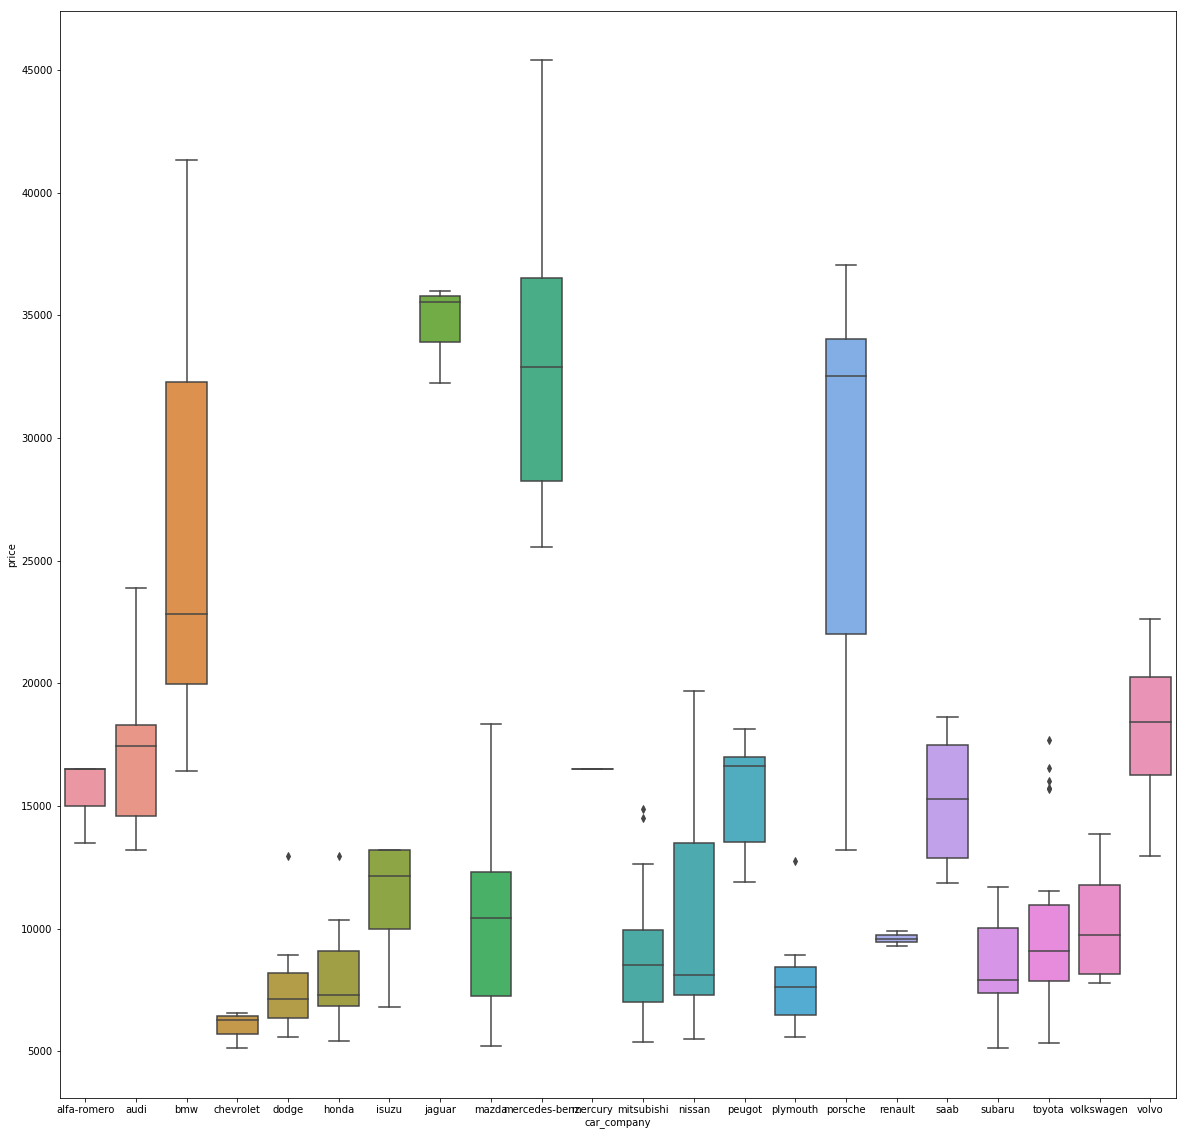

In [31]:
plt.figure(figsize=(20,20))
sns.boxplot(x = 'car_company',y ='price',data = automobile)
plt.show();

Here we can see some relation between the variables: car_company, engine-type, num-of-cylinders and fuel-sytem

In [32]:
#Handling categorivcal variables
#Categorical variables that have only 2 values can be converted to binary and 2+ to dummy variabes
automobile.nunique()
automobile['fuel-type'] = automobile['fuel-type'].map({'gas':0,'diesel':1})
automobile['aspiration'] = automobile['aspiration'].map({'std':0,'turbo':1})
automobile['num-of-doors'] = automobile['num-of-doors'].map({'two':0,'four':1})
automobile['engine-location'] = automobile['engine-location'].map({'rear':0,'front':1})
automobile.drop(columns =['fuel-type','aspiration','num-of-doors','engine-location'],inplace = True)

symboling              6
normalized-losses     51
make                  22
fuel-type              2
aspiration             2
num-of-doors           2
body-style             5
drive-wheels           3
engine-location        2
wheel-base            53
length                75
width                 44
height                49
curb-weight          170
engine-type            7
num-of-cylinders       7
engine-size           44
fuel-system            8
bore                  38
stroke                36
compression-ratio     31
horsepower            59
peak-rpm              22
city-mpg              28
highway-mpg           30
price                185
car_company           22
dtype: int64

In [33]:
#Function to create dummy variables
def create_dummies(df,col):
    dummies = pd.get_dummies(df[col],prefix=col,drop_first =True)
    df = pd.concat([df,dummies],axis =1)
    df.drop(columns = col,inplace = True)
    return df

automobile = create_dummies(automobile,"make")
automobile = create_dummies(automobile,"engine-type")
automobile = create_dummies(automobile,"fuel-system")
automobile = create_dummies(automobile,"num-of-cylinders")
automobile = create_dummies(automobile,"drive-wheels")
automobile = create_dummies(automobile,"body-style")
automobile

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,num-of-cylinders_six,num-of-cylinders_three,num-of-cylinders_twelve,num-of-cylinders_two,drive-wheels_fwd,drive-wheels_rwd,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon
0,3,122,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,1,0,0,0,0
1,3,122,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,1,0,0,0,0
2,1,122,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,1,0,0,0,0,1,0,1,0,0
3,2,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,0,0,0,0,1,0,0,0,1,0
4,2,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,0,0,0,0,0,0,0,0,1,0
5,2,122,99.8,177.3,66.3,53.1,2507,136,3.19,3.40,...,0,0,0,0,1,0,0,0,1,0
6,1,158,105.8,192.7,71.4,55.7,2844,136,3.19,3.40,...,0,0,0,0,1,0,0,0,1,0
7,1,122,105.8,192.7,71.4,55.7,2954,136,3.19,3.40,...,0,0,0,0,1,0,0,0,0,1
8,1,158,105.8,192.7,71.4,55.9,3086,131,3.13,3.40,...,0,0,0,0,1,0,0,0,1,0
9,0,122,99.5,178.2,67.9,52.0,3053,131,3.13,3.40,...,0,0,0,0,0,0,0,1,0,0
